### Importación de datos



In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



#####***Calculamos los ingresos por cada tienda***

In [19]:
ingreso_tienda1 = tienda.Precio.sum()
print(ingreso_tienda1)

1150880400.0


In [20]:
ingreso_tienda2 = tienda2.Precio.sum()
print(ingreso_tienda2)

1116343500.0


In [21]:
ingreso_tienda3 = tienda3.Precio.sum()
print(ingreso_tienda3)

1098019600.0


In [22]:
ingreso_tienda4 = tienda4.Precio.sum()
print(ingreso_tienda4)

1038375700.0


In [77]:
ingresos = {
    "tienda1": ingreso_tienda1,
    "tienda2": ingreso_tienda2,
    "tienda3": ingreso_tienda3,
    "tienda4": ingreso_tienda4
}

# 2. Ventas por categoría

####***Categorias mas populares***


In [40]:
categoria_tienda_1 = tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)


In [41]:
categoria_tienda_2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)

In [42]:
categoria_tienda_3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)

In [43]:
categoria_tienda_4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)

In [46]:
comparativa = pd.concat(
    [categoria_tienda_1, categoria_tienda_2, categoria_tienda_3, categoria_tienda_4],
    axis=1
)
comparativa.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
comparativa = comparativa.fillna(0).astype(int)
comparativa

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


####***Calificacion Promedio***

In [53]:
calificacion_tienda_1 = round(tienda.Calificación.mean(), 2)
print(calificacion_tienda_1)


3.98


In [54]:
calificacion_tienda_2 = round(tienda2.Calificación.mean(), 2)
print(calificacion_tienda_2)


4.04


In [52]:
calificacion_tienda_3 = round(tienda3.Calificación.mean(), 2)
print(calificacion_tienda_3)


4.05


In [51]:
calificacion_tienda_4 = round(tienda4.Calificación.mean(), 2)
print(calificacion_tienda_4)

4.0


In [83]:
calificaciones = {
    "calificacion_tienda_1": calificacion_tienda_1,
    "calificacion_tienda_2": calificacion_tienda_1,
    "calificacion_tienda_3": calificacion_tienda_1,
    "calificacion_tienda_4": calificacion_tienda_1,
}



# 4. Productos más y menos vendidos

####***Productos mas y menos vendidos***

In [32]:
ventas_tienda_1 = tienda.groupby('Producto').size()
print(f"{ventas_tienda_1.idxmax()} {str(ventas_tienda_1.max())}")
print(f"{ventas_tienda_1.idxmin()} {str(ventas_tienda_1.min())}")

Armario 60
Auriculares con micrófono 33


In [33]:
ventas_tienda_2 = tienda2.groupby('Producto').size()
print(f"{ventas_tienda_2.idxmax()} {str(ventas_tienda_2.max())}")
print(f"{ventas_tienda_2.idxmin()} {str(ventas_tienda_2.min())}")

Iniciando en programación 65
Juego de mesa 32


In [34]:
ventas_tienda_3 = tienda3.groupby('Producto').size()
print(f"{ventas_tienda_3.idxmax()} {str(ventas_tienda_3.max())}")
print(f"{ventas_tienda_3.idxmin()} {str(ventas_tienda_3.min())}")

Kit de bancas 57
Bloques de construcción 35


In [35]:
ventas_tienda_4 = tienda4.groupby('Producto').size()
print(f"{ventas_tienda_4.idxmax()} {str(ventas_tienda_4.max())}")
print(f"{ventas_tienda_4.idxmin()} {str(ventas_tienda_4.min())}")

Cama box 62
Guitarra eléctrica 33


# 5. Envío promedio por tienda

In [59]:
porcentaje_tienda_1 = round(tienda['Costo de envío'].mean(), 2)

In [63]:
porcentaje_tienda_2 =  round(tienda2['Costo de envío'].mean(), 2)


In [64]:
porcentaje_tienda_3 = round(tienda3['Costo de envío'].mean(), 2)


In [65]:
porcentaje_tienda_4 = round(tienda4['Costo de envío'].mean(), 2)


In [104]:
porcentajes = {
    "tienda_1": porcentaje_tienda_1,
    "tienda_2": porcentaje_tienda_2,
    "tienda_3": porcentaje_tienda_3,
    "tienda_4": porcentaje_tienda_4,
}


---

#Informe

---




## Introducción

En este informe se evaluará cuáles de las tiendas presentadas generan menores beneficios y, con base en dicho análisis, se tomará una decisión sobre cuál proponer para la venta. La determinación se realizará comparando indicadores clave de desempeño que permiten identificar debilidades operativas y comerciales.

## Objetivo

Identificar la tienda con menor rentabilidad considerando múltiples dimensiones del negocio, con el fin de fundamentar una recomendación estratégica (retención, mejora o venta).

## Criterios de evaluación

Se consideran los siguientes indicadores:

- **Ingresos totales**: volumen de ventas.  
- **Categorías de productos**: desempeño por categoría.  
- **Calificación promedio**: valoración media recibida por los clientes.  
- **Productos más y menos vendidos**: identificación de ítems centrados en demanda y obsolescencia.  
- **Coste de envío promedio**: impacto logístico sobre el margen.

## Metodología de puntuación

Cada criterio asignará un *punto negativo* a la tienda que presente el peor desempeño en ese indicador. La tienda que acumule la mayor cantidad de puntos negativos al final del análisis será la candidata principal para ser vendida.  

> Nota: algunos criterios requieren un análisis más profundo (por ejemplo, la relación entre coste de envío y margen por categoría). En dichos casos se aplicarán subcriterios o ajustes cuantitativos para garantizar una comparación justa.

## Consideraciones y alcance

1. Los periodos analizados y las fuentes de datos se detallarán en la sección de *Datos y supuestos* del informe.   
2. El presente enfoque prioriza la objetividad y la trazabilidad: todas las conclusiones estarán respaldadas por métricas y visualizaciones.

---


####***Calculamos los ingresos por cada tienda***

En este punto tomaremos la cantidad de ingresos que cada tienda tiene, la que menor cantidad de sera la que se lleve el punto



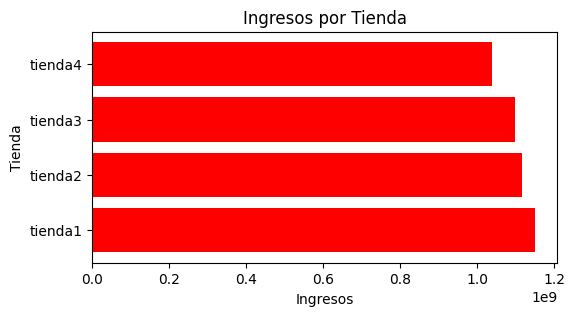

In [78]:
tiendas = list(ingresos.keys())
valores = list(ingresos.values())

plt.figure(figsize=(6, 3))
plt.barh(tiendas, valores, color='red')

plt.title("Ingresos por Tienda")
plt.xlabel("Ingresos")
plt.ylabel("Tienda")
plt.show()

En este caso la que menor cantidad de ingresos produjo era la tienda numero 4, por lo tanto se lleva el primer punto.

---

En la siguiente tabla se presenta el resultado parcial del sistema de puntuación aplicado a cada tienda.  
Recordemos que cada punto representa un desempeño desfavorable en alguno de los criterios evaluados (ingresos, calificaciones, costos de envío, etc.).

| Tienda | Puntuación |
|:-------|:-----------:|
| **Tienda 1** | 0 |
| **Tienda 2** | 0 |
| **Tienda 3** | 0 |
| **Tienda 4** | 1 |


###***Categorias mas populares***

#### Metodología de Análisis por Categoría

A diferencia del punto anterior, en esta sección se adoptará un enfoque analítico diferente.  
Cada tienda presenta un rendimiento particular en cada categoría de productos; sin embargo, no existe una tienda que sea consistentemente la peor en todas las categorías, por lo tanto, se realizará un conteo por categoría, asignando un punto negativo a la tienda con el peor desempeño dentro de cada una.  
Posteriormente, se sumarán los resultados obtenidos en todas las categorías para determinar la tienda con el mayor número de puntos negativos.

##### Procedimiento

1. Evaluación individual por categoría:
   Se comparará el desempeño de cada tienda según los indicadores dentro de cada categoría.

2. Asignación de puntos:
   La tienda con el rendimiento más bajo en una categoría recibirá un punto temporal.

3. Cálculo del total acumulado:  
   Una vez completada la evaluación en todas las categorías, se sumarán los puntos negativos acumulados por cada tienda.

4. Determinación de la penalización global:
   La tienda con mayor cantidad de puntos negativos será la que reciba una penalización adicional en el puntaje global general.

> Nota: Este método permite un análisis más equitativo, evitando que los resultados se vean influenciados por el dominio de una sola tienda en un conjunto reducido de categorías.  
> De esta forma, se obtiene una visión más balanceada del rendimiento global de cada tienda.


/tmp/ipython-input-117583985.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


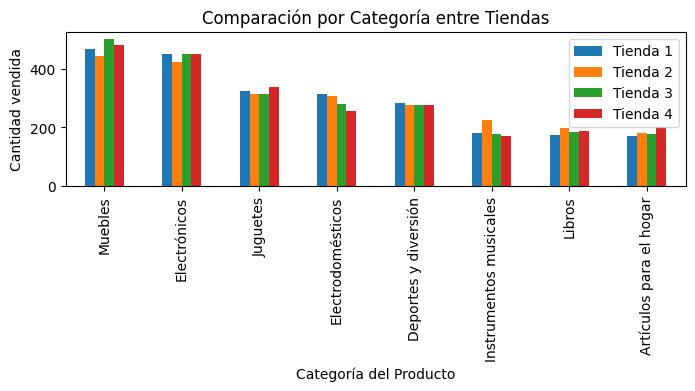

In [82]:
comparativa.plot(kind='bar', figsize=(8, 2))
plt.title("Comparación por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad vendida")
# plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

### Resultados del Análisis por Categorías

Tras aplicar la metodología descrita, se obtuvieron los siguientes puntajes totales por tienda:

| Tienda | Puntos |
|:-------|:-------:|
| **Tienda 1** | 2 |
| **Tienda 2** | 4 |
| **Tienda 3** | 0 |
| **Tienda 4** | 2 |

La **Tienda 2** presenta el peor desempeño en las distintas categorías de producto, acumulando la mayor cantidad de puntos negativos.

## Marcador Global Actualizado

| Tienda | Puntuación Global |
|:-------|:-----------------:|
| **Tienda 1** | 0 |
| **Tienda 2** | 1 |
| **Tienda 3** | 0 |
| **Tienda 4** | 1 |

---

###***Calificacion Promedio***

En la siguiente gráfica se presentan las **calificaciones promedio** obtenidas por cada tienda.  
El objetivo de este análisis es identificar cuál de ellas presenta el **peor desempeño en satisfacción del cliente**.

> La tienda que registre el **promedio más bajo** en calificaciones será la que reciba **un punto negativo** en esta categoría.


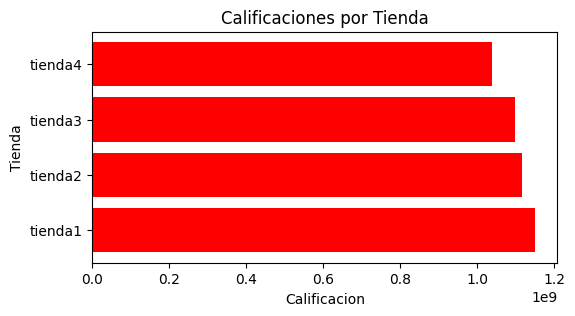

In [84]:
tiendas = list(ingresos.keys())
valores = list(ingresos.values())

plt.figure(figsize=(6, 3))
plt.barh(tiendas, valores, color='red')

plt.title("Calificaciones por Tienda")
plt.xlabel("Calificacion")
plt.ylabel("Tienda")
plt.show()

#### Resultados del Análisis de Calificaciones

De acuerdo con los resultados obtenidos, la **Tienda 1** presenta el peor desempeño en cuanto a **servicio al cliente**, reflejado en su promedio de calificaciones más bajo.  
Por lo tanto, se le asigna **un punto negativo** en esta categoría.

#### Marcador Global Actualizado

| Tienda | Puntuación Global |
|:-------|:-----------------:|
| **Tienda 1** | 1 |
| **Tienda 2** | 1 |
| **Tienda 3** | 0 |
| **Tienda 4** | 1 |

---

### Análisis de Productos Más y Menos Vendidos

En este punto se evaluará el rendimiento de cada tienda con base en sus productos más y menos vendidos.  
El objetivo es determinar el equilibrio de ventas entre ambos extremos para identificar qué tan uniforme es su desempeño comercial.

#### Fórmula de evaluación

La puntuación se calculará mediante la siguiente relación:

$$peso\_unidades\_vendidas = \frac{producto\_menos\_vendidas}{producto\_mas\_vendido}$$

Esta fórmula genera un valor comprendido entre 0.00 y 1.00, donde 1.00 representa el mejor escenario (ventas equilibradas) y valores cercanos a 0.00 indican mayor desequilibrio entre los productos vendidos.

> La tienda cuyo resultado se acerque más a **0.00** será considerada con peor desempeño en esta categoría y, por tanto, recibirá un punto negativo.


In [102]:
tiendas_unidades_vendidas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
values_unidades_vendidas = [
     round(ventas_tienda_1.min()/ventas_tienda_1.max(), 2),
     round(ventas_tienda_2.min()/ventas_tienda_2.max(), 2),
     round(ventas_tienda_3.min()/ventas_tienda_3.max(), 2),
     round(ventas_tienda_4.min()/ventas_tienda_4.max(), 2),
]
values_unidades_vendidas

[0.55, 0.49, 0.61, 0.53]

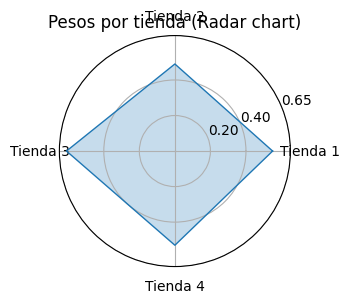

In [103]:
values_unidades_vendidas += values_unidades_vendidas[:1]
angles_unidades_vendidas = np.linspace(0, 2 * np.pi, len(tiendas_unidades_vendidas) + 1)

fig, ax = plt.subplots(figsize=(3,3), subplot_kw=dict(polar=True))
ax.plot(angles_unidades_vendidas, values_unidades_vendidas, linewidth=1, linestyle='solid')
ax.fill(angles_unidades_vendidas, values_unidades_vendidas, alpha=0.25)

ax.set_xticks(angles_unidades_vendidas[:-1])
ax.set_xticklabels(tiendas_unidades_vendidas)
ax.set_yticks([0.2, 0.4, 0.65]) #en realidad la puntuacion es hasta 1, pero ninguna tienda llega a 0.8 asi que es mejor digramarlo asi
ax.set_title('Pesos por tienda (Radar chart)')
plt.show()

### Resultados del Análisis de Peso de Unidades Vendidas

De acuerdo con los resultados mostrados en la gráfica, la Tienda 3 presenta el peor valor de peso_unidades_vendidas, evidenciando un desequilibrio significativo entre sus productos más y menos vendidos.  
Por lo tanto, en esta ocasión, la Tienda 3 recibe un punto negativo.

#### Marcador Global Actualizado

| Tienda | Puntuación Global |
|:-------|:-----------------:|
| **Tienda 1** | 1 |
| **Tienda 2** | 1 |
| **Tienda 3** | 1 |
| **Tienda 4** | 1 |

---

### Análisis de Coste de Envío Promedio

En este punto se transformarán los resultados obtenidos en porcentajes, asumiendo que el 100 % representa el coste total de importación entre todas las tiendas.  

De esta manera, el porcentaje más alto corresponderá a la tienda con mayor coste de envío promedio, lo que indica una menor eficiencia logística y, por consiguiente, un punto negativo en esta categoría.


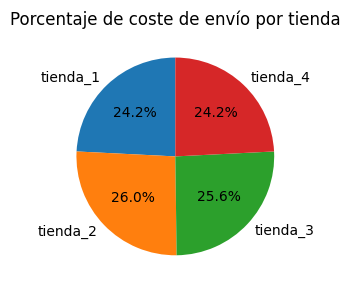

In [106]:

labels = porcentajes.keys()
sizes = porcentajes.values()

plt.figure(figsize=(6, 3))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title('Porcentaje de coste de envío por tienda')
plt.tight_layout()
plt.show()

# Conclusión General

Tras el análisis integral de los indicadores evaluados incluyendo ingresos, calificaciones, desempeño por categorías, equilibrio de ventas y costes de envío se determinó que la Tienda 2 presenta el peor rendimiento global.

#### Marcador Final

| Tienda | Puntuación Total |
|:-------|:-----------------:|
| **Tienda 1** | 1 |
| **Tienda 2** | 2 |
| **Tienda 3** | 1 |
| **Tienda 4** | 1 |

En consecuencia, la Tienda 2 es la que acumula la mayor cantidad de puntos negativos, reflejando un desempeño deficiente en múltiples aspectos operativos y comerciales.  

> **Recomendación:**  
> Con base en los resultados obtenidos, se sugiere vender la Tienda 2, dado que muestra los indicadores más débiles y menor potencial de rentabilidad en comparación con las demás.
